<a href="https://colab.research.google.com/github/ZHAbotorabi/Supply-Chain/blob/main/Time_Series_Modelling_SARIMAX_AND_Holt_Exponential_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Modeling with **SARIMAX** and **Holt Exponential smoothing**

### **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)**
It is a time series forecasting model that extends the ARIMA model by including seasonal components and external variables (exogenous regressors). It is useful when the data exhibits seasonality, trends, and other external influences that can help explain the behavior of the target variable. SARIMAX models the relationship between a time series and its past values (AR), differences (I), and moving averages (MA), while also considering seasonality and exogenous factors.

### **Holt Exponential Smoothing**
It is a forecasting method that **extends simple exponential smoothing** by adding components to capture trends in the data. It has two main components:
1. **Level**: The smoothed value at each point in time.
2. **Trend**: The rate of change over time.

Holt’s method assumes that the data contains a linear trend, and it is often used for data with trends but without strong seasonality.

Both models are widely used in time series forecasting, with SARIMAX being more complex due to the inclusion of seasonal and exogenous variables.

### **Exponential smoothing**
 It is to smooth a time series of data by reducing its noise and capturing the underlying trend or pattern. It does this by assigning more weight to recent observations, allowing the model to adjust more quickly to changes in the data. The goal is to generate a forecast that reflects the most recent behavior of the data while maintaining stability over time.

In simple terms, it helps to predict future values based on past data, giving more importance to recent data points and less to older ones. It's often used when the data doesn't show a clear trend or seasonality.


# Components of Time series Yt=St+Tt+Rt

Types of Components
# 1.	Time-Based Components:
-	**Seasonality(St)**: Regular patterns or fluctuations over specific intervals (e.g., weekly, monthly, annually).
-	**Trend(Tt)**: General direction of data over time (growth, peak, maturity, or decline).
-	**Remainder/Residuals(Rt)**: Variations in the data not explained by seasonality or trend.

# 2.	Regression-Based Components:
-	To be discussed later, especially in the context of ARIMA models.


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
time_series= pd.read_csv('timeseries_rev.csv',parse_dates=True)
time_series.head(2)

,Unnamed: 0,week,year,date,total_revenue
0,96,49,2009,2009-12-01,232177.51
1,99,50,2009,2009-12-07,207908.73


In [ ]:
time_series.tail(2)

,Unnamed: 0,week,year,date,total_revenue
102,95,48,2011,2011-11-28,250833.04
103,98,49,2011,2011-12-05,408044.97


In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   week           104 non-null    int64  
 2   year           104 non-null    int64  
 3   date           104 non-null    object 
 4   total_revenue  104 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [ ]:
time_series['date']= pd.to_datetime(time_series['date'])
time_series['date'].head(2)

,date
0,2009-12-01
1,2009-12-07


In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     104 non-null    int64         
 1   week           104 non-null    int64         
 2   year           104 non-null    int64         
 3   date           104 non-null    datetime64[ns]
 4   total_revenue  104 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.2 KB


In [ ]:
time_series = time_series.set_index('date')
time_series.head(2)

,Unnamed: 0,week,year,total_revenue
date,,,,
2009-12-01,96,49,2009,232177.51
2009-12-07,99,50,2009,207908.73


In [ ]:
time_series.to_csv("time_series.csv")

In [ ]:
time_series = pd.read_csv('time_series.csv',parse_dates=True)
time_series.head(2)

,date,Unnamed: 0,week,year,total_revenue
0,2009-12-01,96,49,2009,232177.51
1,2009-12-07,99,50,2009,207908.73


In [ ]:
time_series = time_series.set_index('date')
time_series.head(2)

,Unnamed: 0,week,year,total_revenue
date,,,,
2009-12-01,96,49,2009,232177.51
2009-12-07,99,50,2009,207908.73


In [ ]:
monthly_series= time_series.total_revenue.resample('ME').sum()
monthly_series.head(2)

,total_revenue
date,
2009-12-31,683504.010
2010-01-31,555802.672


<Axes: xlabel='date'>

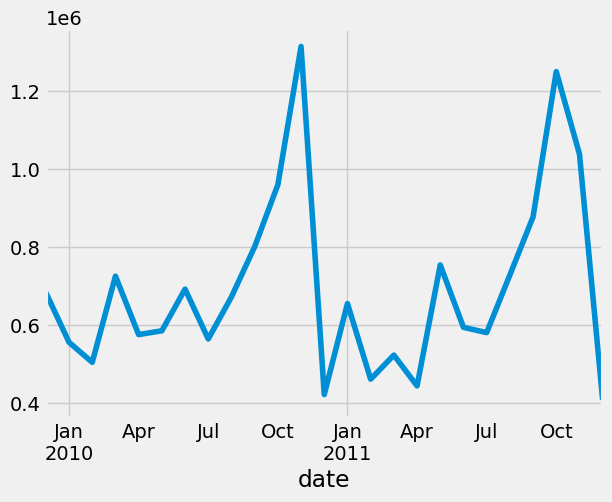

In [ ]:
monthly_series.plot()

## Decomposing Time Series:
- Use decomposition techniques (e.g., Statsmodel's decomposition function) to separate time series into **trend**, **seasonality**, and **residual components**.
-	Helps understand the impact of each component on overall data behavior.


In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

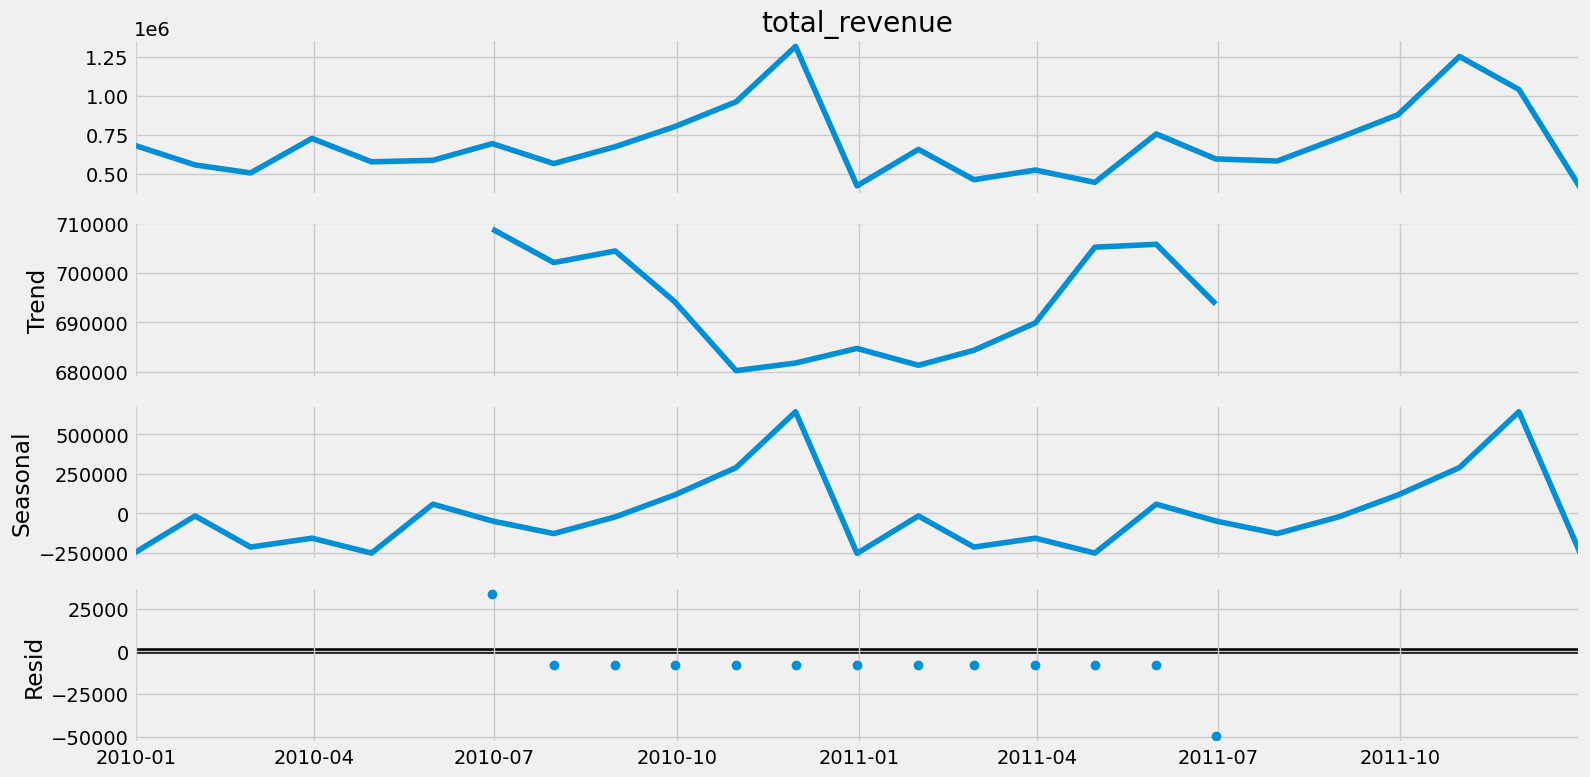

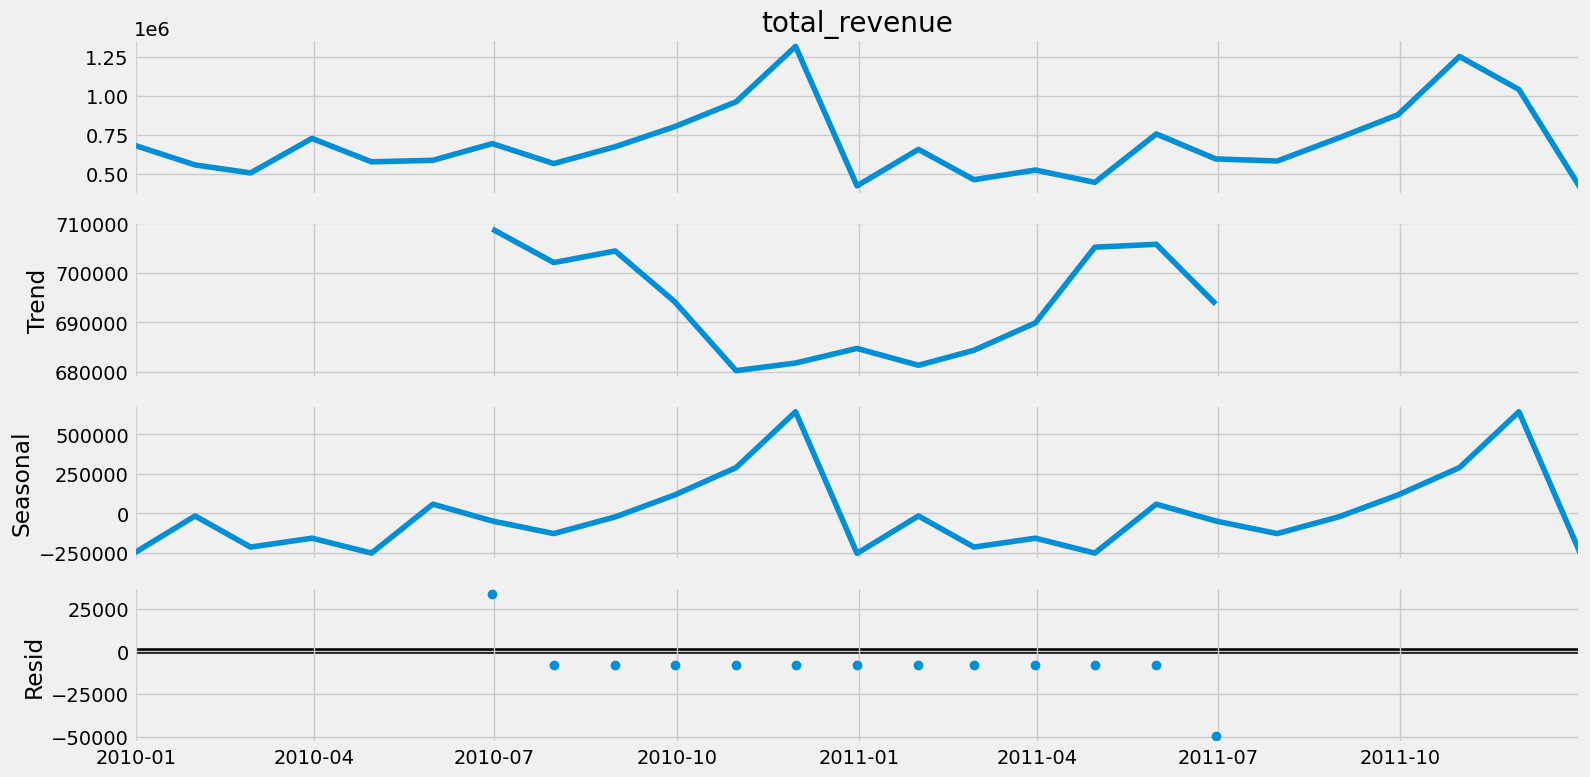

In [ ]:
components= sm.tsa.seasonal_decompose(monthly_series)
components.plot()

# Time-Based Component Details


# 1. Trend(Tt):
-	Reflects long-term changes in data.
-	Example: A new product (e.g., smartphone) shows initial growth, peaks, and eventually declines as demand wanes.
-	Products like PlayStations may show prolonged growth depending on quality and demand cycles.



In [ ]:
trend= components.trend
trend.head(10)

,trend
date,
2009-12-31,NaN
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,708779.226583
2010-07-31,702018.341917
2010-08-31,704359.372833


# 2. Seasonality (St):
Regular, predictable changes in demand at specific intervals:
- Daily: Weekends show increased mall visits.
-	Monthly: Sales spike during Black Friday or Prime Day.
-	Seasonal: Winter clothes sell in winter; summer clothes sell in summer.

Can occur across multiple intervals, such as daily, weekly, monthly, or yearly.


In [ ]:
seasonality= components.seasonal
seasonality.head(10)

,seasonal
date,
2009-12-31,-254693.649139
2010-01-31,-17835.907931
2010-02-28,-214813.899222
2010-03-31,-158558.121347
2010-04-30,-252955.190806
2010-05-31,56784.593278
2010-06-30,-49731.965389
2010-07-31,-129379.863222
2010-08-31,-23768.124139


# 3. Remainder (Residuals) Rt:
-	Represents irregular, unpredictable variations after removing trend and seasonality.

In [ ]:
remainder= components.resid
remainder.head(10)

,resid
date,
2009-12-31,NaN
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,33256.308806
2010-07-31,-8196.798694
2010-08-31,-8196.798694


<Axes: xlabel='date'>

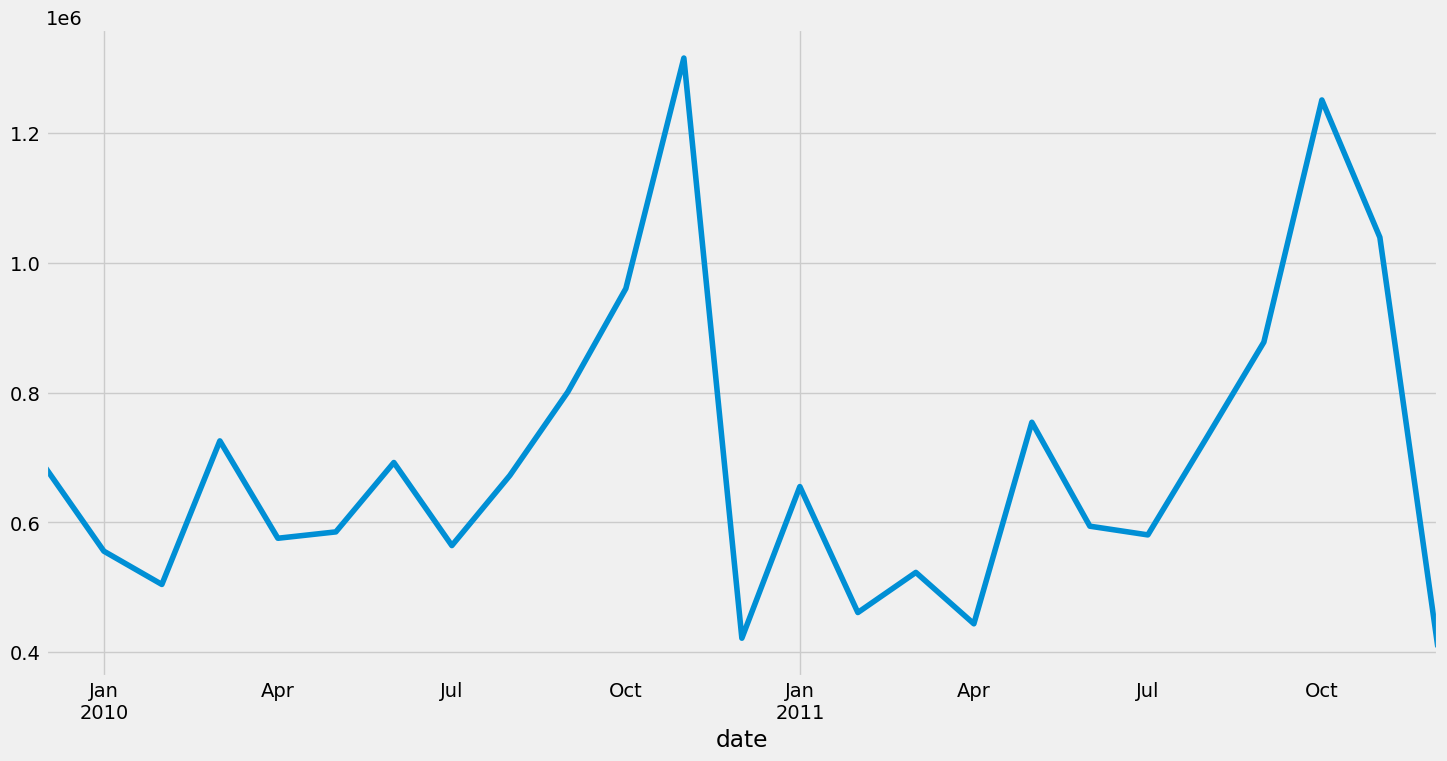

In [ ]:
monthly_series.plot()

<Axes: xlabel='date'>

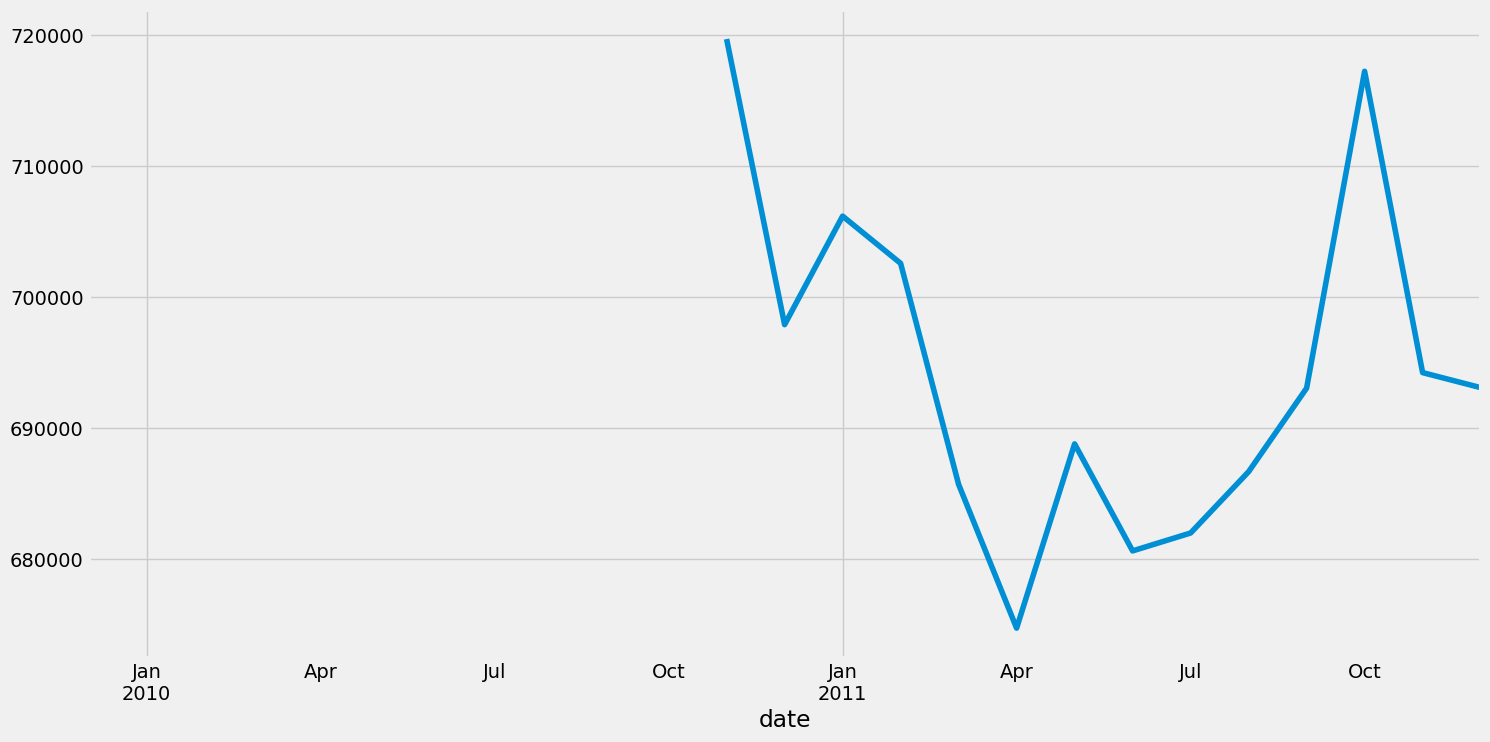

In [ ]:
monthly_series.rolling(window=12).mean().plot()

<Axes: xlabel='date'>

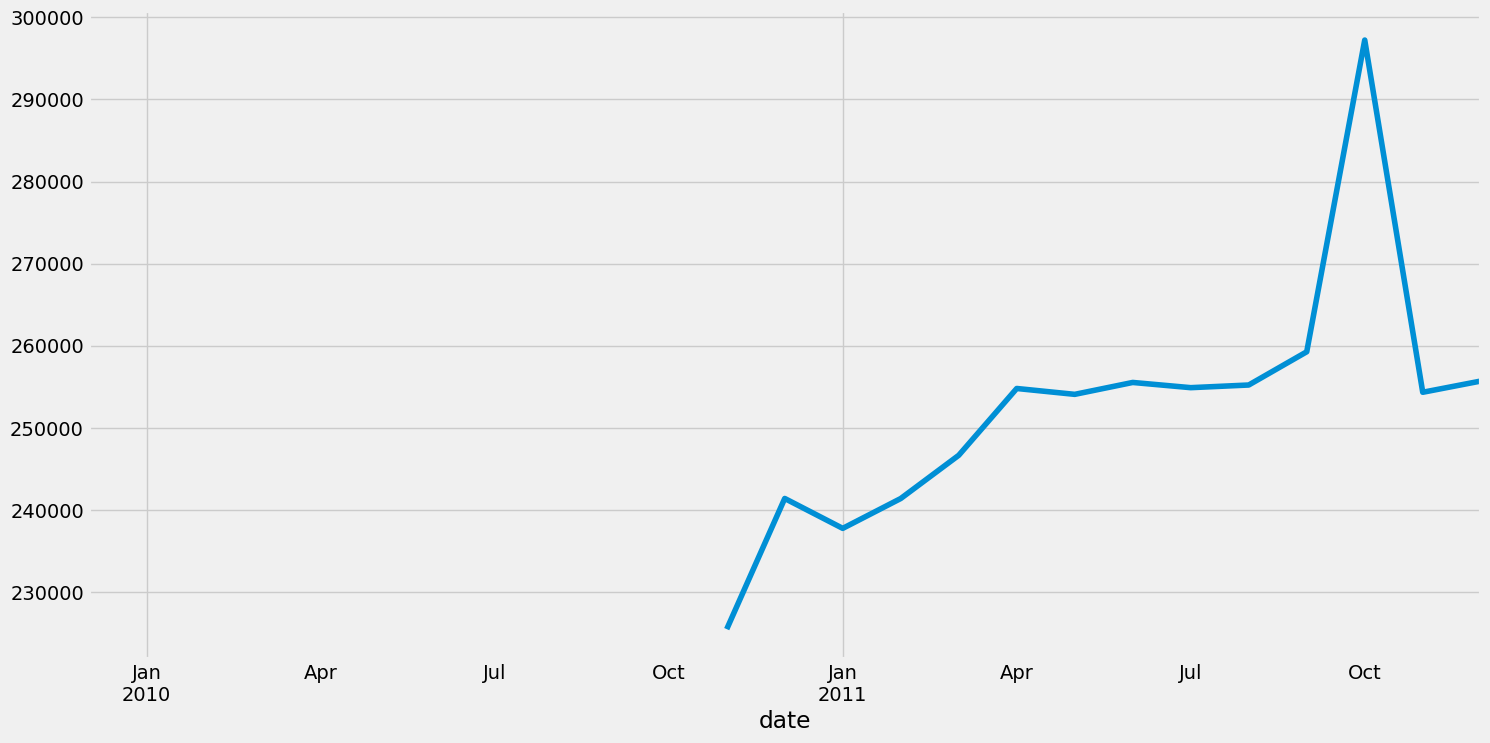

In [ ]:
monthly_series.rolling(window=12).std().plot()

## **Series without Trend**: Add seasonality and residuals to isolate short-term variations

<Axes: xlabel='date'>

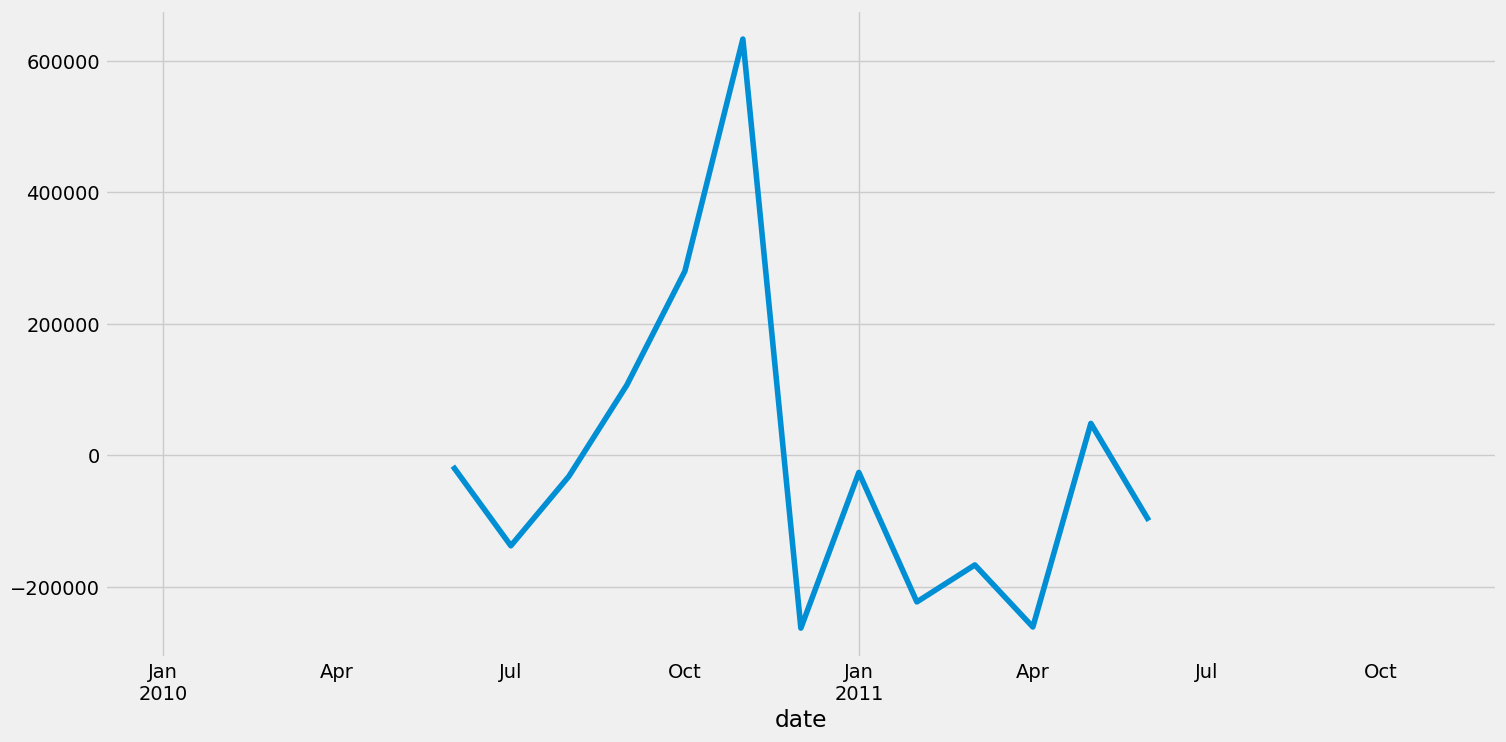

In [ ]:
series_without_trend = seasonality + remainder
series_without_trend.plot()

## **Series without Seasonality:** Add trend and residuals to observe non-seasonal patterns.

<Axes: xlabel='date'>

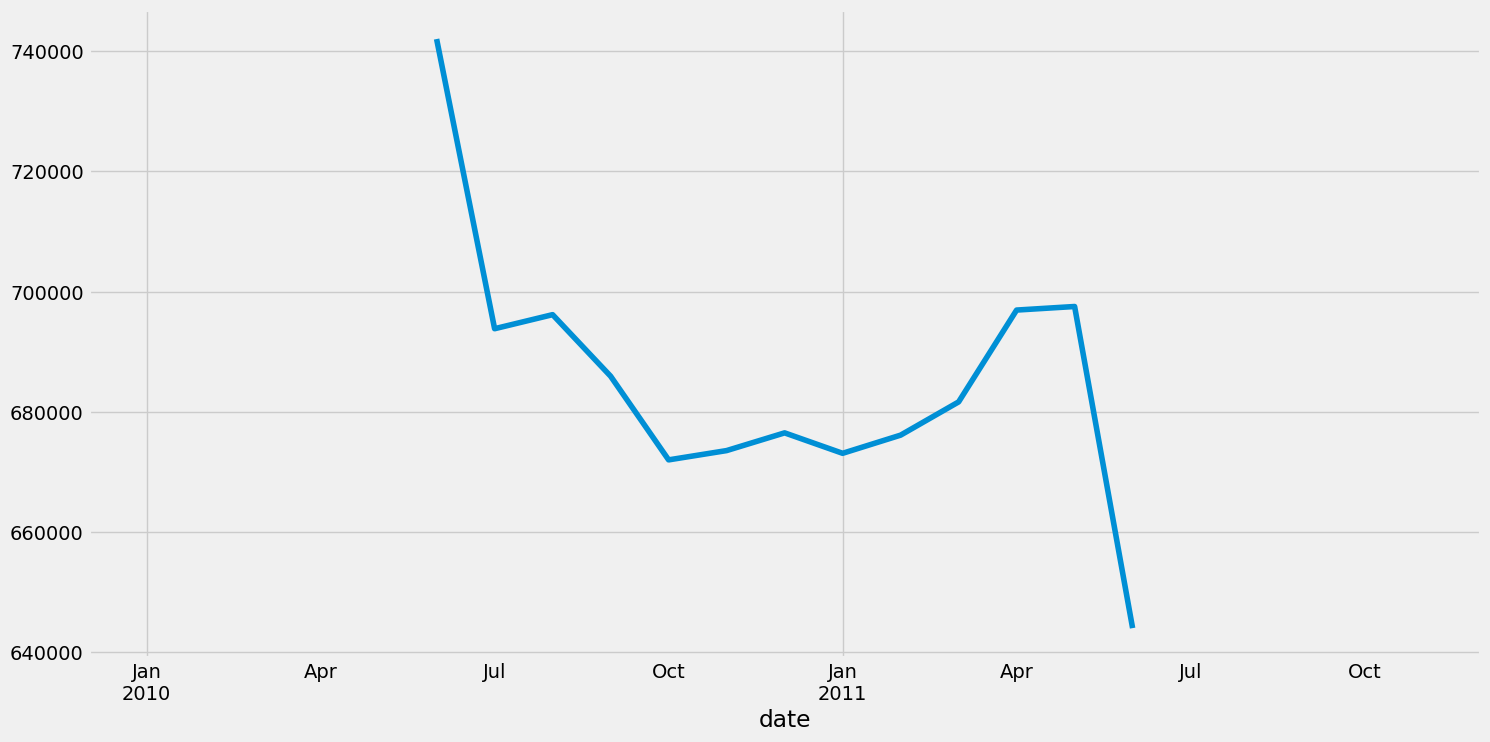

In [ ]:
series_without_seasonality = trend + remainder
series_without_seasonality.plot()

An simple example

``` Python

# Decompose the df time series
result = seasonal_decompose(df['value'], model='additive', period=12)

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Compute variances
variance_trend = np.nanvar(trend)  # Use nanvar to handle NaNs in trend
variance_seasonal = np.nanvar(seasonal)
variance_residual = np.nanvar(residual)

# Compute Strength Measurements
strength_trend = 1 - (variance_trend / (variance_trend + variance_residual))
strength_seasonality = 1 - (variance_seasonal / (variance_seasonal + variance_residual))

# Print results
print("Trend Strength:", strength_trend)
print("Seasonality Strength:", strength_seasonality)


# Augmented Dickey-Fuller Test
Statistical tests make strong assumptions about your data. They can only inform the degree to which a null hypothesis can be rejected or fails to be rejected. The result must be interpreted within the context of a given problem to be meaningful.

Nevertheless, these tests provide a quick check and confirmatory evidence regarding whether a time series is stationary or non-stationary.

The Augmented Dickey-Fuller (ADF) test is a type of statistical test known as a unit root test.

The intuition behind a unit root test is that it assesses how strongly a time series is influenced by a trend.

There are several unit root tests, but the Augmented Dickey-Fuller test is one of the most widely used. It employs an autoregressive model and optimizes an information criterion across multiple lag values to determine the presence of a unit root.

# Hypotheses of the Augmented Dickey-Fuller Test
- The null hypothesis (H₀) of the test states that the time series contains a unit root, meaning it is not stationary and has time-dependent structure.

- The alternative hypothesis (H₁) states that the time series does not have a unit root, meaning it is stationary and does not exhibit time-dependent structure.

# Null Hypothesis (H₀):
If we fail to reject H₀, it suggests the time series has a unit root and is non-stationary.
# Alternative Hypothesis (H₁):
If we reject H₀, it suggests the time series does not have a unit root and is stationary.

# Interpreting the p-Value
The result of the ADF test is interpreted using the p-value. A p-value below a chosen threshold (commonly 5% or 1%) suggests that we reject the null hypothesis, indicating the time series is stationary. Conversely, a p-value above the threshold suggests we fail to reject the null hypothesis, meaning the time series is non-stationary.

- **p-value > 0.05**: Fail to reject H₀ → The data has a unit root and is non-stationary.
- **p-value ≤ 0.05**: Reject H₀ → The data does not have a unit root and is stationary.

``` Python
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('file.csv', header=0, index_col=0, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

https://machinelearningmastery.com/time-series-data-stationary-python/


Sample Result:
``` Python
ADF Statistic: -1.717017
p-value: 0.422367
	5%: -2.884
	1%: -3.482
	10%: -2.579
  

We can see that the ADF Statistic is larger than the critical values. This means we fail to reject the null hypothesis, indicating that

 **the time series is non-stationary.**

# Dickey-Fuller Test:

In [ ]:
ad_fuller_test= sm.tsa.stattools.adfuller(monthly_series,autolag='AIC')
ad_fuller_test


(-3.6538709278964343,
 0.004810825532514097,
 9,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 418.7649518406608)

In [ ]:
#X = series.values
#X = log(X)
#result = adfuller(X)
result = ad_fuller_test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.653871
p-value: 0.004811
	1%: -3.964
	5%: -3.085
	10%: -2.682


- **p-value: 0.004811 ≤ 0.05**: Reject H₀ → The data does not have a unit root and mountly series is **stationary**.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

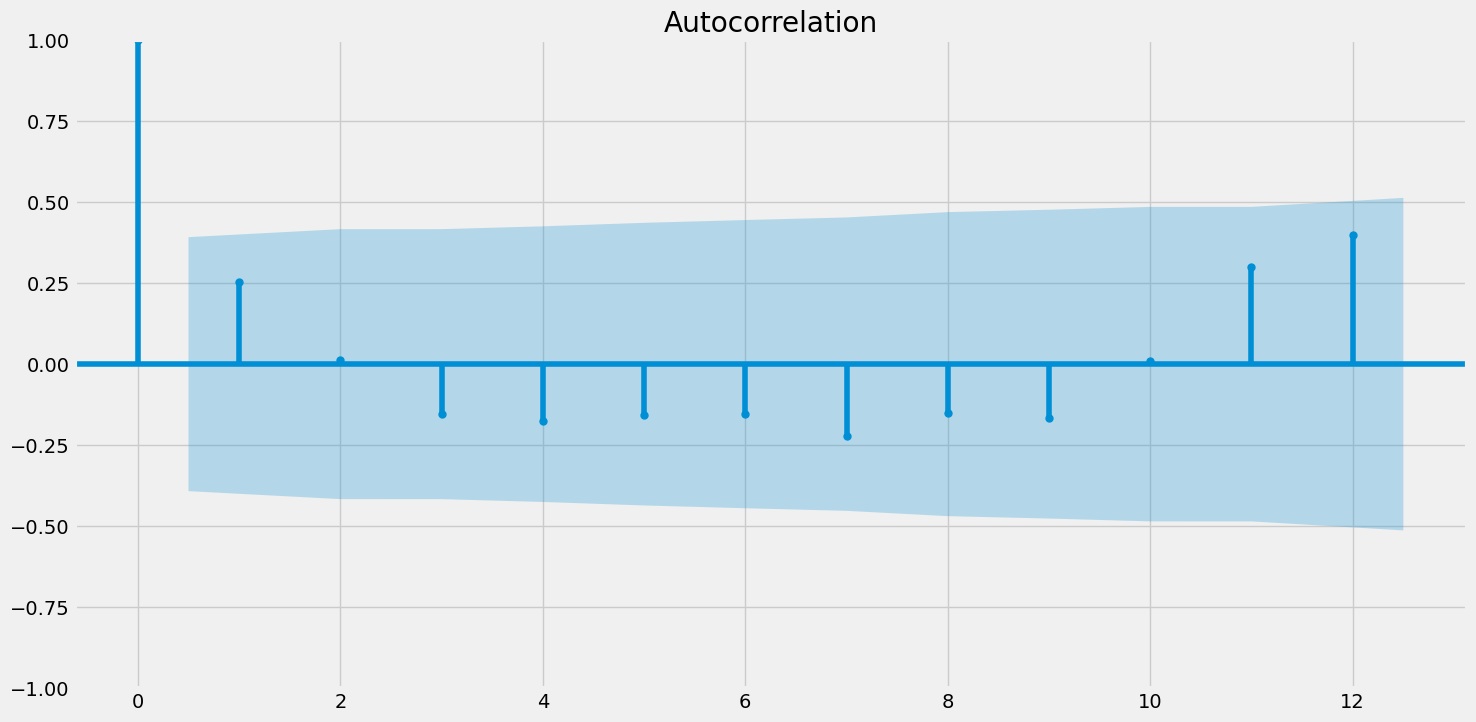

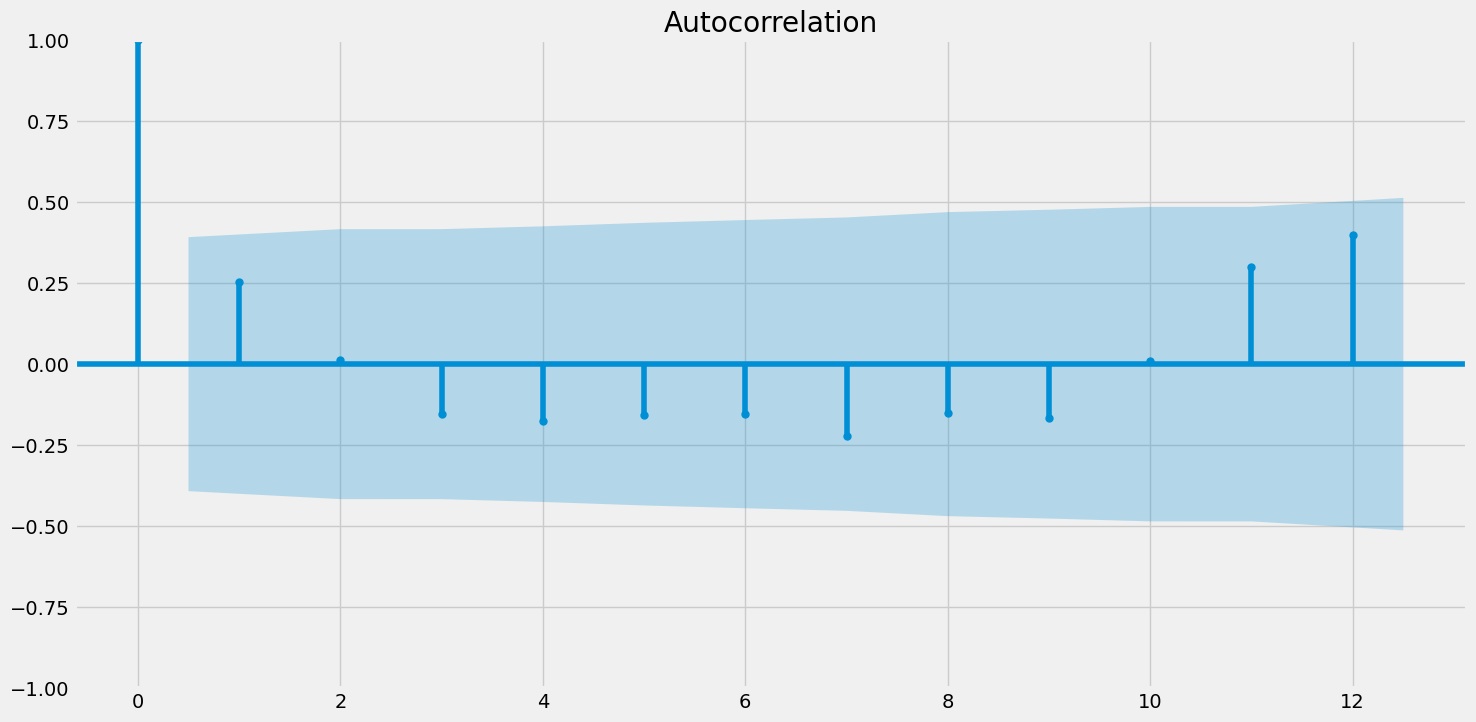

In [ ]:
plot_acf(monthly_series)

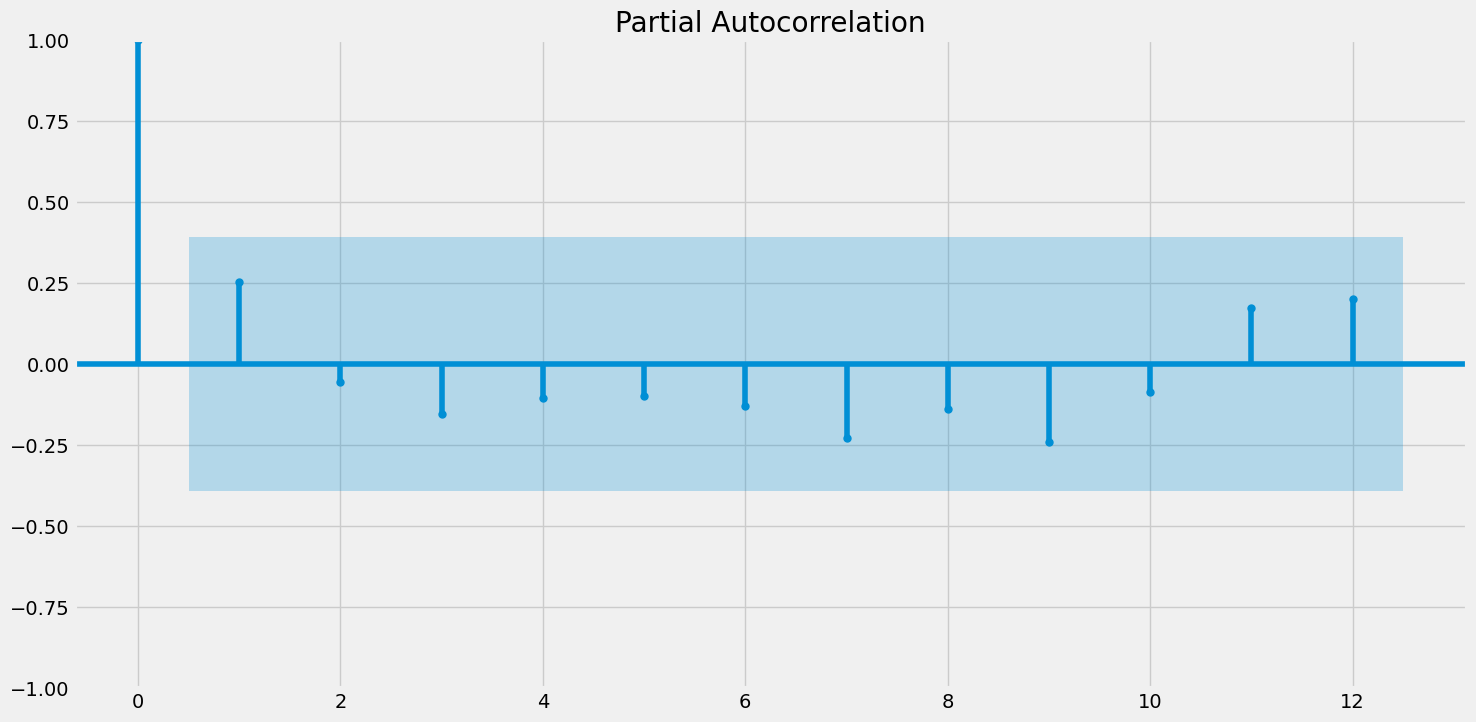

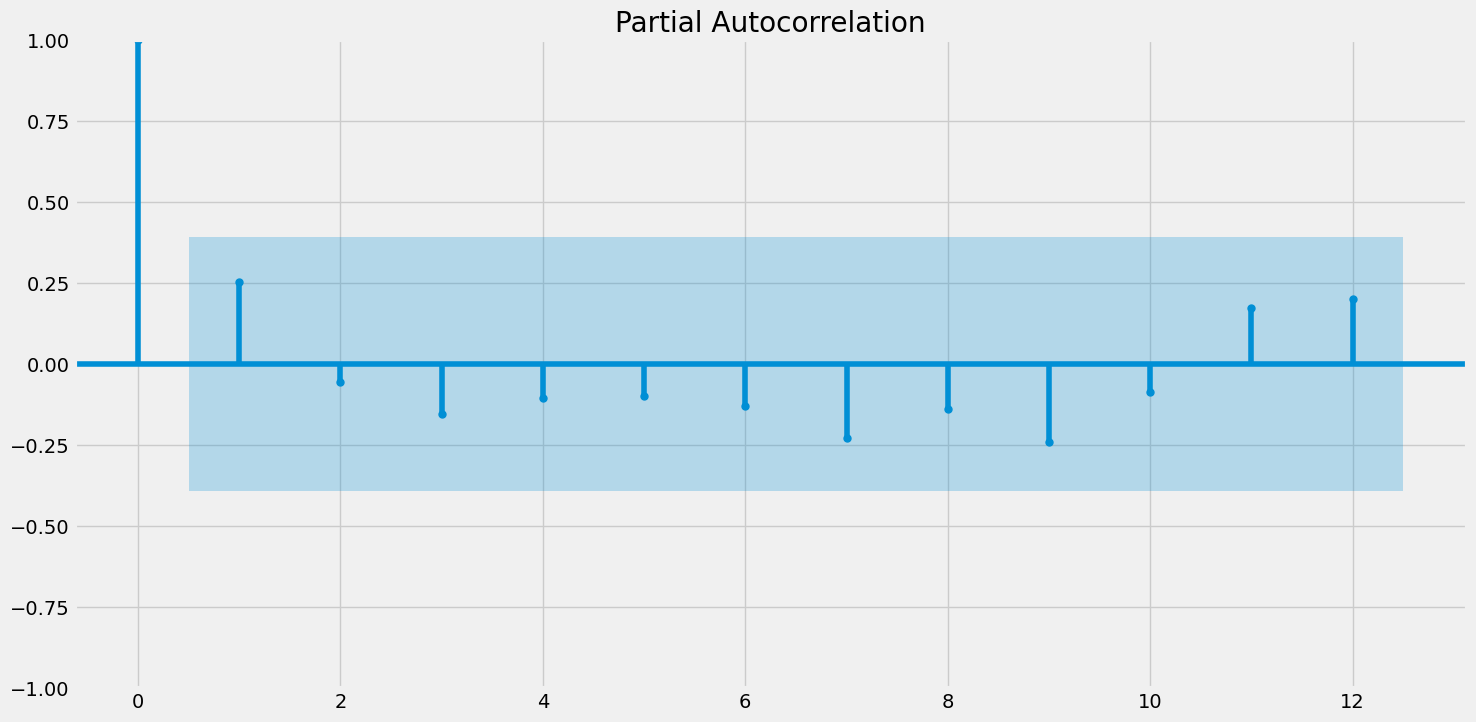

In [ ]:
plot_pacf(monthly_series)

# Akaike Information Criterion (AIC) in ARMA Models

The term `results_ARma.aic` refers to the **Akaike Information Criterion (AIC)** value of the ARMA model. AIC is a statistical measure used to evaluate the quality of a model, where a **lower AIC value** indicates a more optimal model.

---

### What is AIC?
AIC is defined by the following formula:


$$ AIC = -2 \ln(L) + 2k $$

where:
- \( L \) is the **likelihood** of the model.
- \( k \) is the **number of estimated parameters** in the model.

AIC is primarily used **to compare different models**—the model with the **lowest AIC value** is generally preferred. However, AIC does not provide an absolute measure of model quality but rather helps in **relative comparison** among different models.

---

### How to Interpret AIC?
- **Lower AIC** → A more optimal and well-fitted model.
- **Higher AIC** → The model may be overfitting or not fitting the data well.
- **Comparing models** → The model with the smallest AIC value is usually chosen.


In [ ]:
model_ma= sm.tsa.statespace.SARIMAX(monthly_series,order= (0,0,1))

In [ ]:
results_ma= model_ma.fit()
results_ma

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
results_ma.aic

735.7906414433097

In [ ]:
model_AR= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,0))
results_AR= model_AR.fit()

results_AR.aic

703.4620739015523

In [ ]:
model_ARma= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,1))
results_ARma= model_ARma.fit()

results_ARma.aic

702.1603952406704

In [ ]:
model_ARima= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,1,1))
results_ARima= model_ARima.fit()

results_ARima.aic

672.0261771707904

**Comparing models** → The model with the smallest AIC value is usually chosen : results_**ARima.aic = 672.02618** -> ARIMA(1,1,1)

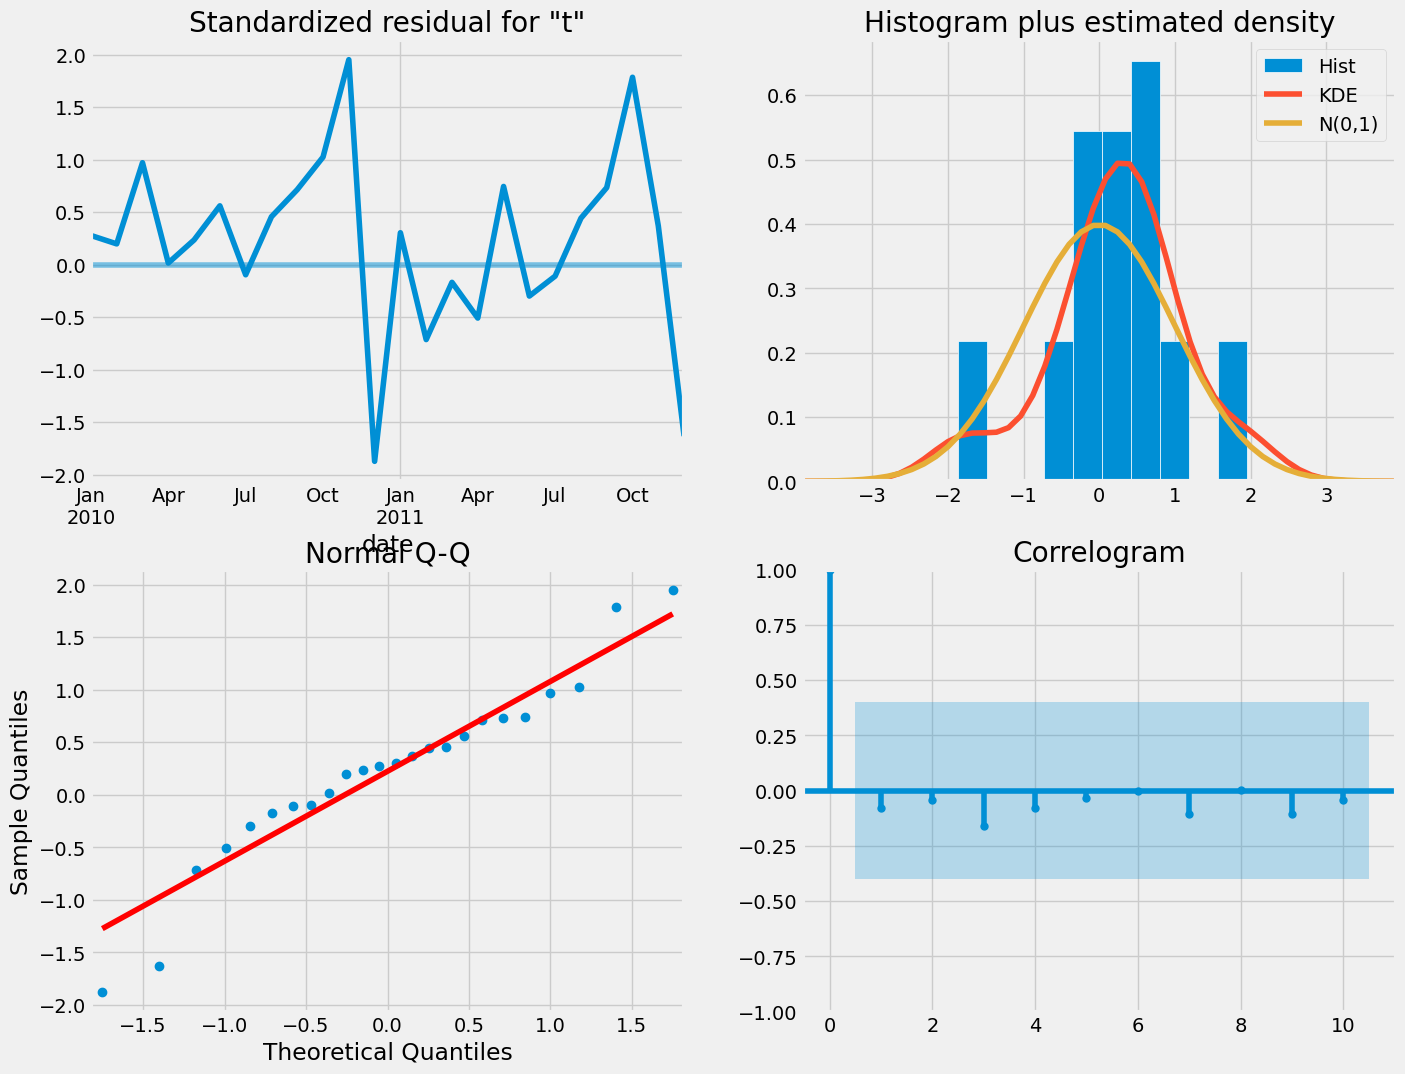

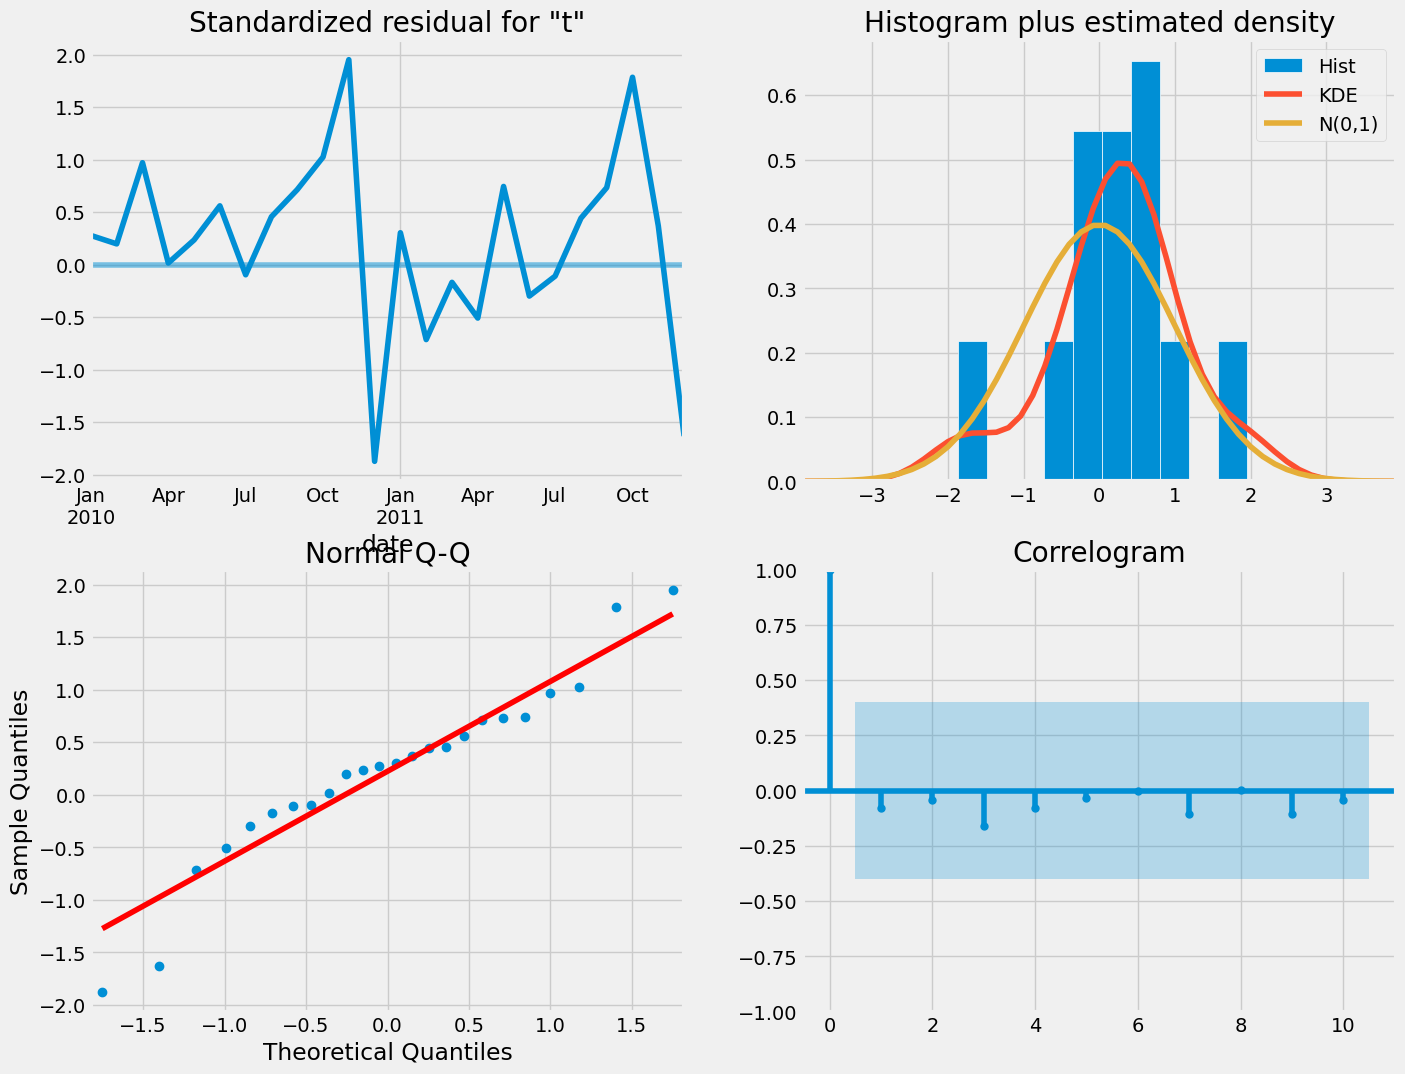

In [ ]:
results_ARima.plot_diagnostics(figsize=(15, 12))

# **Interpretation of ARIMA Diagnostic Plots**

## 1. Top Left: Standardized Residuals over Time
- This plot shows the standardized residuals (\(t\)) over time.
- It helps identify patterns or anomalies in the residuals.
- Ideally, the residuals should fluctuate randomly around zero, without any visible trend or periodicity.
- Any systematic patterns or clustering of points may indicate that the ARIMA model has not captured all relevant information in the data.

## 2. Top Right: Histogram with Normal Curve
- Displays the distribution of residuals (model errors) with a fitted normal distribution curve.
- If the histogram closely matches the normal curve, the residuals are normally distributed, a key assumption for ARIMA.
- Significant deviations suggest revisiting model parameters or applying data transformations.

## 3. Bottom Left: Normal Q-Q Plot
- Evaluates the normality of residuals.
- Points lying along the red line indicate the residuals are approximately normally distributed.
- Deviations from the line may require adjustments to the model.

## 4. Bottom Right: Correlogram (ACF Plot)
- Assesses the autocorrelation of residuals to verify if they behave like white noise.
- Bars within the blue confidence intervals indicate uncorrelated residuals, suggesting the model fits well.
- Bars outside these intervals indicate autocorrelation, implying the model may need improvement.

---

 Key Takeaways
- **Stationarity:** Ensure the time series is stationary before fitting the ARIMA model.
- **Residual Diagnostics:** Residuals should be normally distributed, uncorrelated, and resemble white noise.
- **Model Improvement:** If these conditions are not met, revisit the ARIMA parameters (\(p\), \(d\), \(q\)) or preprocess the data further.


In [ ]:
import itertools

In [ ]:
P=D=Q=p=d=q= range(0,3)

In [ ]:
S= 12

In [ ]:
combinations= list(itertools.product(p,d,q,P,D,Q))
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 1, 2),
 (0, 0, 0, 0, 2, 0),
 (0, 0, 0, 0, 2, 1),
 (0, 0, 0, 0, 2, 2),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 2),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 2),
 (0, 0, 0, 1, 2, 0),
 (0, 0, 0, 1, 2, 1),
 (0, 0, 0, 1, 2, 2),
 (0, 0, 0, 2, 0, 0),
 (0, 0, 0, 2, 0, 1),
 (0, 0, 0, 2, 0, 2),
 (0, 0, 0, 2, 1, 0),
 (0, 0, 0, 2, 1, 1),
 (0, 0, 0, 2, 1, 2),
 (0, 0, 0, 2, 2, 0),
 (0, 0, 0, 2, 2, 1),
 (0, 0, 0, 2, 2, 2),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 0, 2),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 0, 1, 2),
 (0, 0, 1, 0, 2, 0),
 (0, 0, 1, 0, 2, 1),
 (0, 0, 1, 0, 2, 2),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 0, 2),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 0, 1, 1, 1, 2),
 (0, 0, 1, 1, 2, 0),
 (0, 0, 1, 1, 2, 1),
 (0, 0, 1, 1, 2, 2),
 (0, 0, 1, 2, 0, 0),
 (0, 0, 1, 2, 0, 1),
 (0, 0, 1, 2,

In [ ]:
len(combinations)

729

In [ ]:
arima_orders=[(x[0],x[1],x[2]) for x in combinations]
arima_orders[0][0]

0

In [ ]:
seasonal_orders=[(x[3],x[4],x[5],S) for x in combinations]
seasonal_orders

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12),
 (0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12),
 (0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 

In [ ]:
results_data= pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])
results_data

,p,d,q,P,D,Q,AIC


In [ ]:
### length of combinatioons
len(combinations)

729

In [ ]:
for i in range(len(combinations)):
     try:

          model = sm.tsa.statespace.SARIMAX(monthly_series,order=arima_orders[i],
                                        seasonal_order= seasonal_orders[i]
                                       )
          result= model.fit()
          results_data.loc[i,'p']= arima_orders[i][0]
          results_data.loc[i,'d']= arima_orders[i][1]
          results_data.loc[i,'q']= arima_orders[i][2]
          results_data.loc[i,'P']= seasonal_orders[i][0]
          results_data.loc[i,'D']= seasonal_orders[i][1]
          results_data.loc[i,'Q']= seasonal_orders[i][2]
          results_data.loc[i,'AIC']= result.aic
     except:
          continue

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

In [ ]:
results_data

,p,d,q,P,D,Q,AIC
0,0,0,0,0,0,0,748.198753
1,0,0,0,0,0,1,765.395113
2,0,0,0,0,0,2,733.323416
3,0,0,0,0,1,0,354.479831
4,0,0,0,0,1,1,352.462424
...,...,...,...,...,...,...,...
724,2,2,2,2,1,1,16.0
725,2,2,2,2,1,2,315.612198
726,2,2,2,2,2,0,14.0
727,2,2,2,2,2,1,16.0


In [ ]:
results_data.sort_values(by='AIC')

,p,d,q,P,D,Q,AIC
87,0,1,0,0,2,0,2.0
168,0,2,0,0,2,0,2.0
88,0,1,0,0,2,1,4.0
195,0,2,1,0,2,0,4.0
330,1,1,0,0,2,0,4.0
...,...,...,...,...,...,...,...
46,0,0,1,2,0,1,739.583659
74,0,0,2,2,0,2,741.148838
47,0,0,1,2,0,2,741.583574
0,0,0,0,0,0,0,748.198753


In [ ]:
results_data[results_data.AIC==results_data.AIC.min()]

,p,d,q,P,D,Q,AIC
87,0,1,0,0,2,0,2.0
168,0,2,0,0,2,0,2.0


In [ ]:
best_model= sm.tsa.statespace.SARIMAX(monthly_series,order=(0,1,0),
                                        seasonal_order=(0,2,0,12)
                                       )

In [ ]:
results= best_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [ ]:
monthly_series

,total_revenue
date,
2009-12-31,683504.010
2010-01-31,555802.672
2010-02-28,504558.956
2010-03-31,725625.131
2010-04-30,575677.512
2010-05-31,585491.210
2010-06-30,692303.570
2010-07-31,564441.680
2010-08-31,672394.450


In [ ]:
fitting = results.get_prediction(start='2009-12-31')

In [ ]:
fitting_mean= fitting.predicted_mean

In [ ]:
forecast= results.get_forecast(steps=12)

In [ ]:
forecast_mean= forecast.predicted_mean

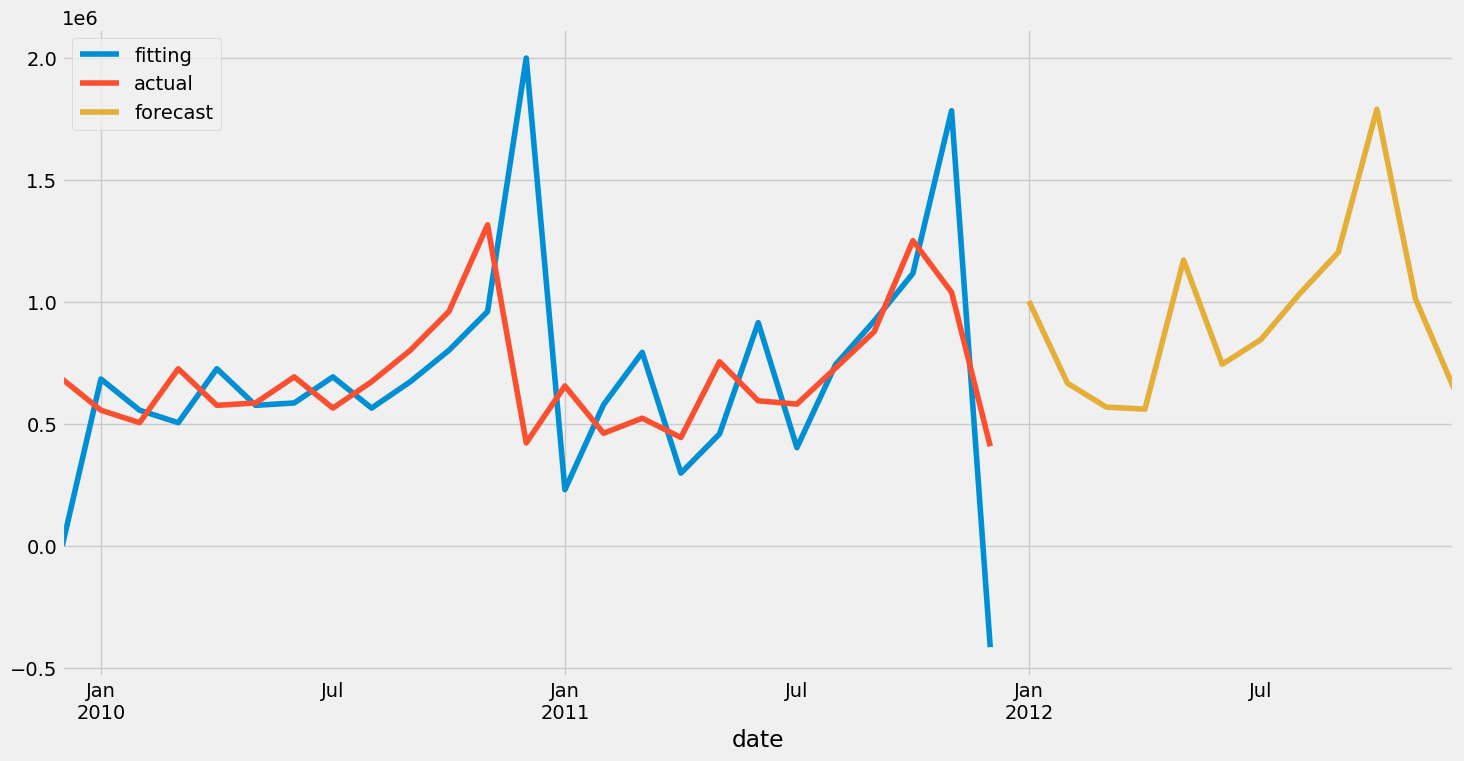

In [ ]:
fitting_mean.plot(label='fitting')
monthly_series.plot(label="actual") # total_revenue
forecast_mean.plot(label="forecast")
plt.legend(loc='upper left')

In [ ]:
mean_abs_error_1= np.mean(np.abs(fitting_mean-monthly_series[-12:]))
mean_abs_error_1

292582.79950001044

In [ ]:
mean_abs_error_2= abs(fitting_mean-monthly_series).mean()
mean_abs_error_2

292655.5181600097

In [ ]:
model_ARima = sm.tsa.statespace.SARIMAX(monthly_series,order= (1,1,1))
results_ARima= model_ARima.fit()

In [ ]:
results_ARima.aic

672.0261771707904

In [ ]:
fitting_ARima = results_ARima.get_prediction(start='2009-12-31')

In [ ]:
fitting_ARima_mean= fitting_ARima.predicted_mean

In [ ]:
mae_ARima= np.mean(np.abs(fitting_ARima_mean-monthly_series[-12:]))
mae_ARima

183968.3040095634

### 183968.304 < 292655.518 ????!!!!

In [ ]:
import statsmodels as sm
sm.tsa.holtwinters.ExponentialSmoothing

statsmodels.tsa.holtwinters.model.ExponentialSmoothing

In [ ]:
model_expo_1= sm.tsa.holtwinters.ExponentialSmoothing(monthly_series,trend='add',seasonal='add',seasonal_periods=12)
model_expo_2= sm.tsa.holtwinters.ExponentialSmoothing(monthly_series,trend='add',seasonal='mul',seasonal_periods=12)
model_expo_3= sm.tsa.holtwinters.ExponentialSmoothing(monthly_series,trend='mul',seasonal='add',seasonal_periods=12)
model_expo_4= sm.tsa.holtwinters.ExponentialSmoothing(monthly_series,trend='mul',seasonal='mul',seasonal_periods=12)

In [ ]:
results_expo_1= model_expo_1.fit()
results_expo_2= model_expo_2.fit()
results_expo_3= model_expo_3.fit()
results_expo_4= model_expo_4.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
results_expo_1.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,348055194398.488
Optimized:,True,AIC,615.919
Trend:,Additive,BIC,635.421
Seasonal:,Additive,AICC,729.919
Seasonal Periods:,12,Date:,"Thu, 20 Feb 2025"
Box-Cox:,False,Time:,01:22:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0403571,beta,True


In [ ]:
results_expo_2.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,348455512867.802
Optimized:,True,AIC,615.948
Trend:,Additive,BIC,635.450
Seasonal:,Multiplicative,AICC,729.948
Seasonal Periods:,12,Date:,"Thu, 20 Feb 2025"
Box-Cox:,False,Time:,01:23:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


In [ ]:
results_expo_3.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,347736714481.942
Optimized:,True,AIC,615.896
Trend:,Multiplicative,BIC,635.398
Seasonal:,Additive,AICC,729.896
Seasonal Periods:,12,Date:,"Thu, 20 Feb 2025"
Box-Cox:,False,Time:,01:24:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0403571,beta,True


In [ ]:
results_expo_4.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,347424178432.163
Optimized:,True,AIC,615.873
Trend:,Multiplicative,BIC,635.375
Seasonal:,Multiplicative,AICC,729.873
Seasonal Periods:,12,Date:,"Thu, 20 Feb 2025"
Box-Cox:,False,Time:,01:24:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


In [ ]:
fit_1= model_expo_1.fit().predict(0,len(monthly_series))
fit_2= model_expo_2.fit().predict(0,len(monthly_series))
fit_3= model_expo_3.fit().predict(0,len(monthly_series))
fit_4= model_expo_4.fit().predict(0,len(monthly_series))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: >

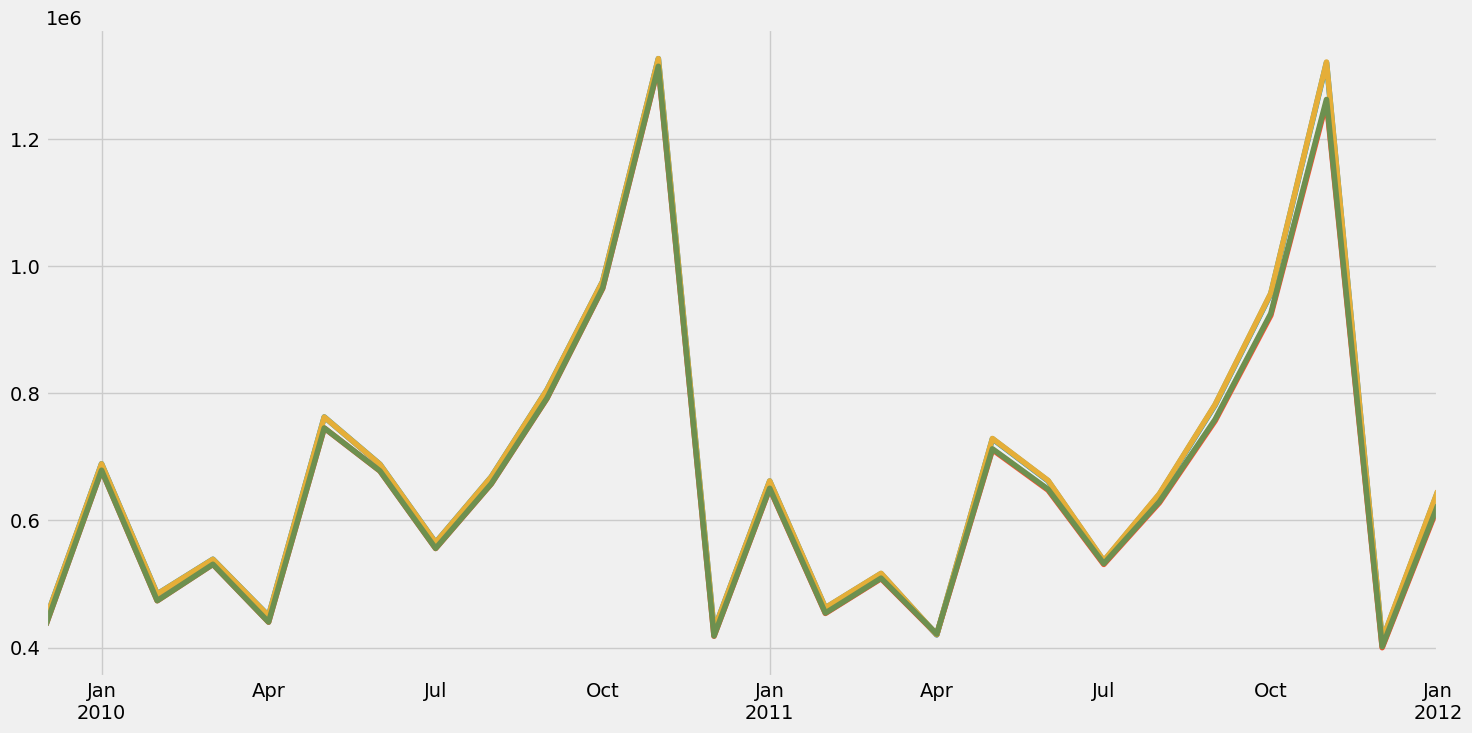

In [ ]:
fit_1.plot(label='fit_1')
fit_2.plot(label='fit_2')
fit_3.plot(label='fit_3')
fit_4.plot(label='fit_4')

In [ ]:
mae_fit_1= np.mean(np.abs(fit_1-monthly_series[-12:]))
mae_fit_2= np.mean(np.abs(fit_2-monthly_series[-12:]))
mae_fit_3= np.mean(np.abs(fit_3-monthly_series[-12:]))
mae_fit_4= np.mean(np.abs(fit_4-monthly_series[-12:]))

In [ ]:
print(mae_fit_1,mae_fit_2,mae_fit_3,mae_fit_4)

78217.35158418072 81149.96055859985 78094.79103651468 80493.22810602828


In [ ]:
forecast = model_expo_1.fit().predict(0,len(monthly_series)+12)
forecast

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,0
2009-12-31,4.448904e+05
2010-01-31,6.891205e+05
2010-02-28,4.842876e+05
2010-03-31,5.389200e+05
2010-04-30,4.499204e+05
2010-05-31,7.628028e+05
2010-06-30,6.883621e+05
2010-07-31,5.652052e+05
2010-08-31,6.685699e+05
2010-09-30,8.054543e+05


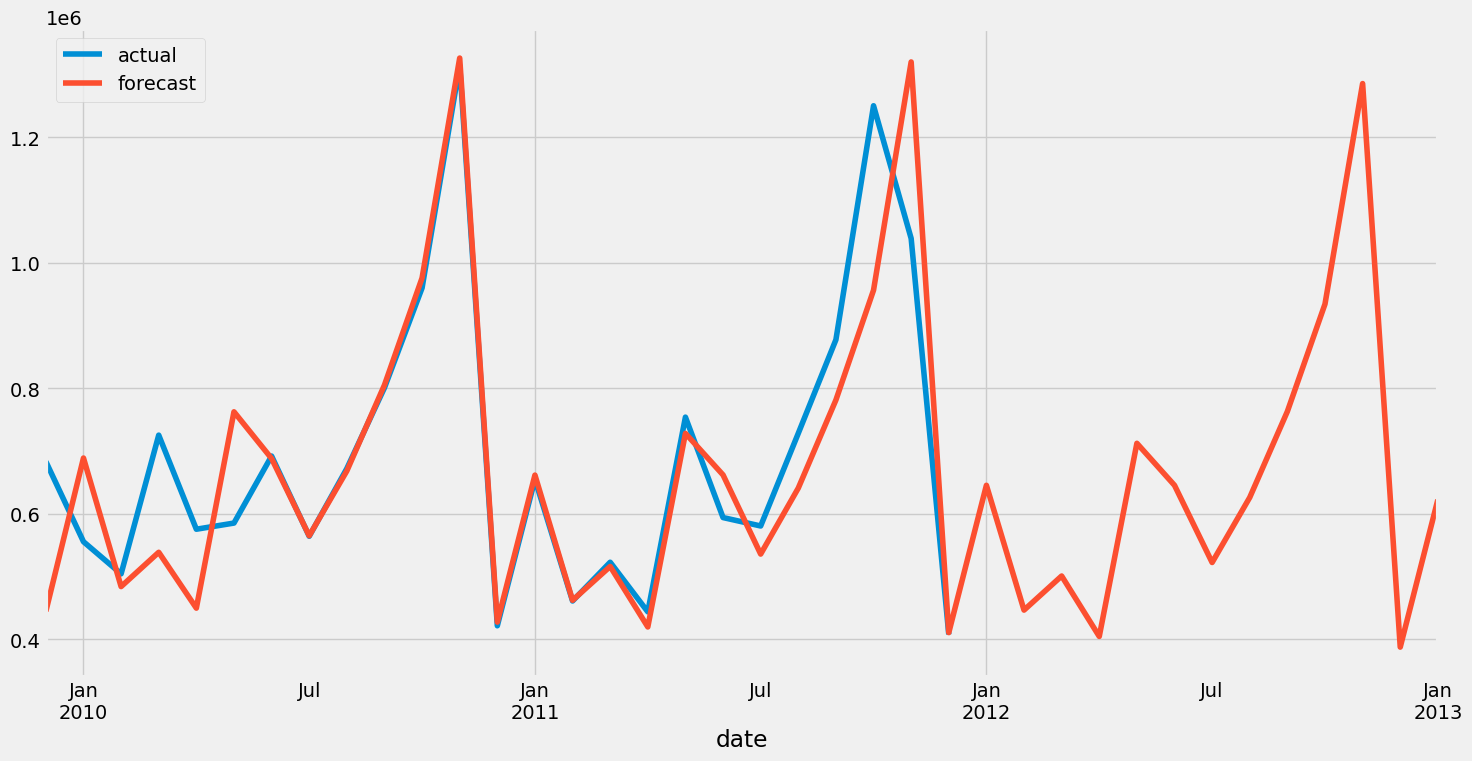

In [ ]:
monthly_series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend(loc='upper left')